# Sentiment Classification of Apple and Google Tweets Using NLP
Group: DS-PT II Group 6

Students Names: Kevin Karanja, Charity Mwangangi, Edna Maina, Keith Tongi, Edgar Muturi, Jacob Abuon

Student pace: Part time/ Remote

Scheduled Project Review: 03/09/2025

## Business Problem
Apple and Google regularly face public scrutiny on Twitter with users sharing both positive and negative experiences with their products. For both companies, it is important to understand the customer sentiment in order to:
1. Protect brand reputation
2. Identify specific customer complaints
3. Utilise customer feedback to guide future product development.

However, because this feedback is voluminous, it is difficult to manually review all of it. Therefore, such organizations need models that assess customer sentiments in large volumes of data.

## Business Understanding
In today’s digital economy, customer sentiment plays a crucial role in shaping brand reputation, influencing purchasing decisions, and guiding product development. Social media platforms such as Twitter have become major channels where customers share their opinions, frustrations, and praise for products and services. For technology giants like Apple and Google, monitoring and analyzing these conversations provides valuable insights into how their products are perceived in real time. Sentiment analysis, powered by Natural Language Processing (NLP), offers a scalable way to extract meaning from large volumes of unstructured text data and classify user attitudes as positive, negative, or neutral.

The dataset for this project originates from CrowdFlower (via data.world) and contains over 9,000 tweets mentioning Apple and Google products. Each tweet has been labeled by human raters to indicate the expressed sentiment—positive, negative, or neither—making the dataset well-suited for supervised machine learning tasks. The human annotations improve data reliability and provide a solid ground truth for training and evaluating models. Tweets, by nature, are short and informal, often including slang, abbreviations, and emojis, which introduces challenges but also ensures that the model captures real-world communication patterns.

From a business perspective, the ability to automatically classify customer sentiment offers multiple benefits. Companies can use these insights to track public perception of product launches, identify recurring pain points, and benchmark brand reputation against competitors. For instance, comparing sentiment trends between Apple and Google can highlight areas where one brand excels while the other faces criticism. In addition, automated sentiment monitoring reduces reliance on manual analysis, enabling organizations to make data-driven decisions faster and at scale.

By building an NLP model to analyze sentiment in these tweets, this project seeks to demonstrate how businesses can transform raw social media data into actionable intelligence. The outcome is not only a technical solution but also a strategic tool for enhancing customer engagement, guiding marketing efforts, and ultimately driving competitive advantage.

**Stakeholders**: Apple and Google Marketing Teams


## Data Understanding

In [28]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [29]:
df = pd.read_csv('tweet_data.csv', encoding= 'latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [31]:
df.shape

(9093, 3)

From the above, we can see that the data is organized into 9093 rows and 3 columns: 
* tweet_text
* emotion_in_tweet_is_directed_at
* is_there_an_emotion_directed_at_a_brand_or_product

These column names are quite lengthy. Let's simplify them in the Data cleaning process.

## Data Cleaning

In [32]:
# Change column names to be more user-friendly
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Device', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion'})

# Confirm the changes
df.head()
                        

,Tweet,Device,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [33]:
# Check for missing values 
print(df.isnull().sum())
# Check for duplicates
print(df.duplicated().sum())


Tweet         1
Device     5802
Emotion       0
dtype: int64
22


From the above, we see that there is 1 missing value in the 'Tweet' column, 5802 missing values in the 'Device' column and none in the 'Emotion' column. There are 22 duplicates.

We will proceed to drop the duplicates column and fill 'unknown' for the missing values in the device column. For the 1 missing value in the 'Tweet' column we will delete the entire row.

In [34]:
# Drop duplicates
df = df.drop_duplicates()
# Fill missing values in 'Device' column with 'unknown'
df['Device'] = df['Device'].fillna('unknown')
# Drop rows with missing values in 'Tweet' column
df = df.dropna(subset=['Tweet'])


In [35]:
# Confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    9070 non-null   object
 1   Device   9070 non-null   object
 2   Emotion  9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB


Let's take a look at the value counts within the emotion column to understand the relationship between positive, negative and neutral tweets.

In [36]:
df['Emotion'].value_counts()

Emotion
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

As you can see in the cell above, there are 4 different types of sentiments expressed about the devices: 'No emotion toward brand or product', 'Positive emotion', 'Negative emotion' and 'I can't tell'.

These are too lengthy, so we will rename them into something more user-friendly.

Also, the first and last column are quite similar, so we will proceed to merge them into one.


In [37]:
# Merge 'No emotion toward brand or product' and 'I can't tell' into 'Neutral'
def clean_emotions(df, column): #Building function to change emotions
    emotion_list = [] #Making list for new names of emotions
    for i in df[column]:
        if i == "No emotion toward brand or product": #Renaming no emotions
            emotion_list.append('Neutral') #Renaming as Neutral
        elif i == "I can't tell": #Renaming I can't tell
            emotion_list.append('Neutral') #Renaming as Neutral
        elif i == "Positive emotion": #Renaming positive emotion
            emotion_list.append('Positive') #Renaming as Positive
        elif i == "Negative emotion": #Renaming negative emotion
            emotion_list.append('Negative') #Renaming as Negative
    df['Emotion'] = emotion_list #Setting column to new names
    return df

df = clean_emotions(df, 'Emotion') #Set df to clean emotions function
df['Emotion'].value_counts() #Checking value counts to see if they were changed

Emotion
Neutral     5531
Positive    2970
Negative     569
Name: count, dtype: int64

Let's take a look at the value counts within the device column to understand the column distribution

In [38]:
#value counts 
df['Device'].value_counts()

Device
unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

The distribution across products is quite skewed. More than half of the tweets don’t reference a specific product. To address this, we plan to introduce a new column called “Brand”, which will indicate whether the tweet relates to Apple or Google, using the information already available in the “Product” column. Since the dataset focuses on these two companies, having this brand-level detail may prove useful later, so it makes sense to set it up now.

The process will be as follows: first, we’ll review all entries in the “Device” column. Next, we’ll write a function that goes through this column and assigns the appropriate brand to the new column. If the product is not specified, the function will then check the tweet text itself for product-related keywords. If no keywords are found, the brand will remain “Unknown.” If terms for both Apple and Google are detected, the entry will be labeled “Both.” The goal is to create more balanced classes for this new feature.

In [39]:
device_mapping = {
    "iPad": "Apple",
    "Apple": "Apple",
    "iPad or iPhone App": "Apple",
    "iPhone": "Apple",
    "Other Apple product or service": "Apple",
    
    "Google": "Google",
    "Other Google product or service": "Google",
    "Android": "Google",
    "Android App": "Google",
    
    "Unknown": "Unknown",
    
}

# Map first from the Device column
df["Brand"] = df["Device"].map(device_mapping).fillna("Unknown")

# Handle "Both" case if tweet mentions both Apple and Google/Android
df["Brand"] = df.apply(
    lambda row: "Both" if (
        ("apple" in str(row["Tweet"]).lower() or "ip" in str(row["Tweet"]).lower()) and
        ("google" in str(row["Tweet"]).lower() or "android" in str(row["Tweet"]).lower())
    ) else row["Brand"],
    axis=1
)

# Check final distribution
brand_distribution = df["Brand"].value_counts()
brand_distribution

Brand
Unknown    5575
Apple      2359
Google      836
Both        300
Name: count, dtype: int64

We also want to try and understand a few characteristics of the tweets. To acheive this, we will add 3 more columns to our dataset that will be useful for the exploratory data analysis (EDA) process: 
1. Tweet character count.
2. Hashtags.
3. Hashtag count.

In [40]:
def tweet_character_count(text_of_tweet): #Function to count characters in tweet
    return len(text_of_tweet.strip()) #Returns length of tweet

df['Tweet Character Count'] = df.apply(lambda row: tweet_character_count(row['Tweet']), axis = 1) #Making new column

df['Hashtag'] = df['Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x)) #Making hashtag column

df['Hashtag Count'] = df['Hashtag'].str.len() #Creating column with number of Hashtags used

# df['Clean'] = df['Tweet'] #New column for cleaned tweets

df.head() #Checking to see if columns were created accurately

,Tweet,Device,Emotion,Brand,Tweet Character Count,Hashtag,Hashtag Count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,127,"[#RISE_Austin, #SXSW]",2
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,139,[#SXSW],1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,79,"[#iPad, #SXSW]",2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,82,[#sxsw],1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,131,[#SXSW],1


### Text Pre-processing

Before we begin tokenisation, we need to omit the stopwords that exist within the tweets. This is because they are bulky datapoints that will only slow down our model. However, a realisation that words that convey negative sentiment is quickly apparent. We, therefore, need to take a look at the stopwords library to determine whether it is suitable.

It is clear that omitting all stopwords will get rid of negative sentiments within tweets. So, to address this issue, we will run code that keeps these stop words intact within the tweets.

In [41]:
# NLTK libraries imported
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
# Instantiate tokenizer and lemmatizer
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
lemmatizer = WordNetLemmatizer()

# Load NLTK stopwords
stop_words = set(stopwords.words("english"))

# Define negation words you want to KEEP
negation_words = {"no", "not", "nor", "never", "none", "nobody", 
                  "nothing", "neither", "cannot", "n't"}

# Words you want to REMOVE (custom)
extra_stopwords = {"link", "rt", "sxsw", "amp"}

# Create final custom stopwords
custom_stopwords = (stop_words - negation_words) | extra_stopwords

print("Default stopwords count:", len(stop_words))
print("Custom stopwords count:", len(custom_stopwords))
print("Negations preserved:", negation_words)

Default stopwords count: 198
Custom stopwords count: 199
Negations preserved: {'neither', "n't", 'nothing', 'not', 'cannot', 'nobody', 'no', 'never', 'none', 'nor'}


The results above show that the default list contained 198 words, but after customization, the list expanded to 199 stopwords. This indicates that an additional word was added to better fit the dataset and business context. At the same time, common negation words such as not, never, and no were deliberately preserved. This is important for sentiment analysis because removing negations could change the meaning of a tweet (e.g., “not good” vs. “good”), which would negatively affect model accuracy.

In order to turn a tweet into text data that can be modelled on NLP, we need to do the following:
1. Make everything lowercase
2. Remove all URLs or URL placeholder values
3. Remove all mentions and hashtags
4. Remove all characters that aren't letters
5. Remove all punctuation
6. Remove all extra spaces

In [43]:
#Preprocess the text

def clean_text(text):
    text = text.lower()
    # Remove mentions, hashtags, and URLs
    text = re.sub(r'@\w+|#\w+|http\S+|www\S+|https\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords (custom list)
    cleaned_text = [word for word in tokens if word not in custom_stopwords]
    
    # Lemmatize
    cleaned_text = [lemmatizer.lemmatize(word) for word in cleaned_text]  
    return cleaned_text

In [44]:
# Apply preprocessing to the correct column
df["Clean_Tweet"] = df["Tweet"].apply(clean_text)

# Preview cleaned text
print(df[["Tweet", "Clean_Tweet"]].head())

                                               Tweet  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                         Clean_Tweet  
0  [iphone, hr, tweeting, dead, need, upgrade, pl...  
1  [know, awesome, ipadiphone, app, youll, likely...  
2                            [not, wait, also, sale]  
3  [hope, year, festival, isnt, crashy, year, iph...  
4  [great, stuff, fri, marissa, mayer, google, ti...  


Next, we will take a look at tweet length

In [51]:
df["word_count"] = df["Clean_Tweet"].apply(lambda x:len(str(x).split()))
df["char_count"] = df["Clean_Tweet"].apply(lambda x:len(str(x)))

In [52]:
df.head()

,Tweet,Device,Emotion,Brand,Tweet Character Count,Hashtag,Hashtag Count,Clean_Tweet,word_count,char_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,127,"[#RISE_Austin, #SXSW]",2,"[iphone, hr, tweeting, dead, need, upgrade, pl...",8,76
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,139,[#SXSW],1,"[know, awesome, ipadiphone, app, youll, likely...",12,119
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,79,"[#iPad, #SXSW]",2,"[not, wait, also, sale]",4,31
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,82,[#sxsw],1,"[hope, year, festival, isnt, crashy, year, iph...",8,71
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,131,[#SXSW],1,"[great, stuff, fri, marissa, mayer, google, ti...",13,135


From this visualisation, we have ended up with a cleaned dataset that has organised our data into 8 columns. We have completed preprocessing the data.

## Exploratory Data Analysis

Having tokenised our tweets, we need to gain a clear understanding of the dataset. We will generate visuals to help with that. To help with that, let us visualise the head of the data to understand what categories we are dealing with.

In [53]:
df.head()

,Tweet,Device,Emotion,Brand,Tweet Character Count,Hashtag,Hashtag Count,Clean_Tweet,word_count,char_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,127,"[#RISE_Austin, #SXSW]",2,"[iphone, hr, tweeting, dead, need, upgrade, pl...",8,76
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,139,[#SXSW],1,"[know, awesome, ipadiphone, app, youll, likely...",12,119
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,79,"[#iPad, #SXSW]",2,"[not, wait, also, sale]",4,31
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,82,[#sxsw],1,"[hope, year, festival, isnt, crashy, year, iph...",8,71
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,131,[#SXSW],1,"[great, stuff, fri, marissa, mayer, google, ti...",13,135


1. Distribution of Emotions

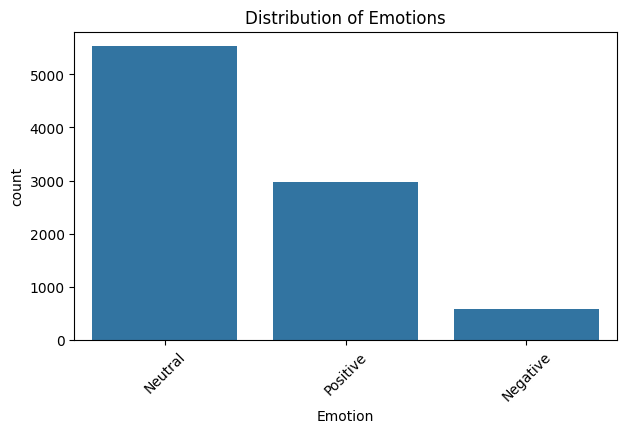

In [55]:
plt.figure(figsize=(7,4))
sns.countplot(x="Emotion", data=df, order=df["Emotion"].value_counts().index)
plt.title("Distribution of Emotions")
plt.xticks(rotation=45)
plt.show()

From the bar chart above, we can see the distribution of emotions in the dataset. Most of the tweets express Neutral, followed by Positive and Negative emotions as the least frequent. This distribution gives us insights into the overall sentiment of the tweets and can guide our analysis and model training.

2. Distribution of Brands and Emotions

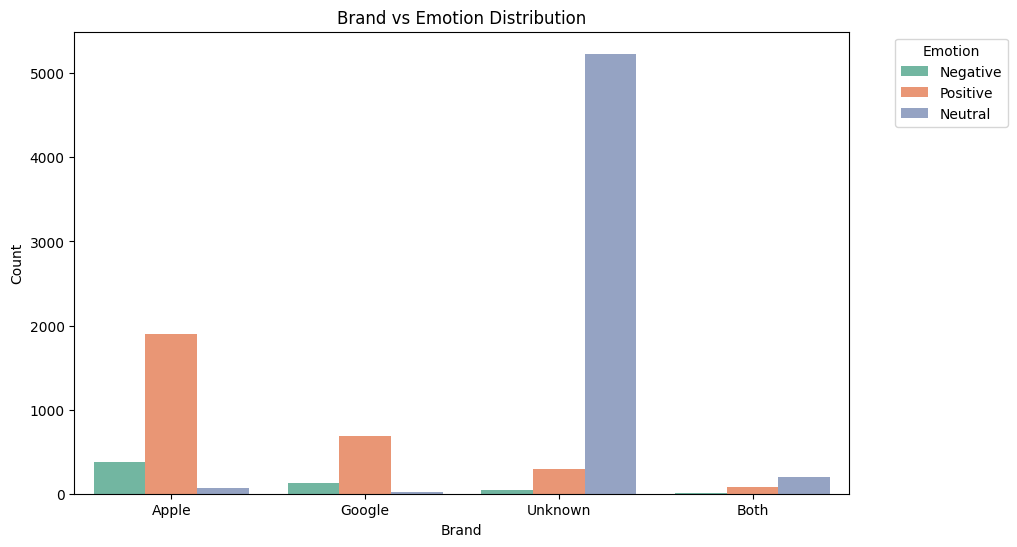

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x="Brand", hue="Emotion", data=df, palette="Set2")
plt.title("Brand vs Emotion Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

The chart above shows:
- Apple: Most tweets are positive, followed by negative, with very few neutral mentions.
- Google: Tweets are also mostly positive, but at a much lower volume compared to Apple.
- Both: Very few tweets mention both brands, with sentiment fairly balanced but minimal.
- Unknown: The majority of tweets fall into this category, and almost all are neutral, which heavily skews the overall dataset.

Overall, the chart suggests Apple attracts more public attention and stronger sentiment (both positive and negative), while Google has fewer mentions. The dominance of neutral tweets in the “Unknown” group highlights a large portion of data that may not be brand-specific.

3. Clean Tweet Length Distribution

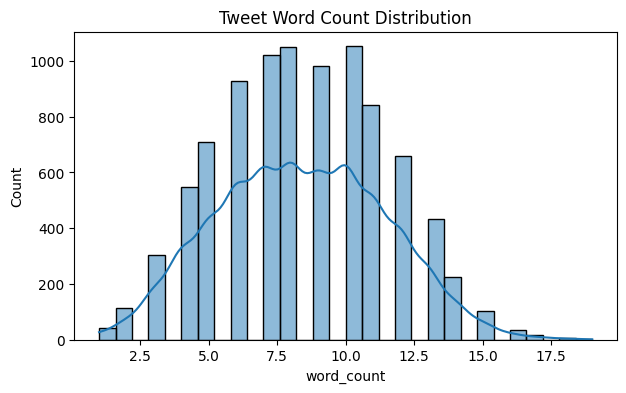

In [50]:
plt.figure(figsize=(7,4))
sns.histplot(df["word_count"], bins=30, kde=True)
plt.title("Tweet Word Count Distribution")
plt.show()

Most clean tweets in the dataset are short, averaging aroung 8-10 words, with very few being extremely short or long, reflecting Twitter’s concise communication style.

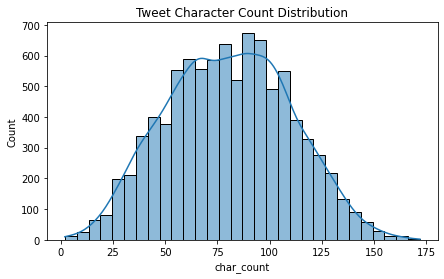

In [118]:
plt.figure(figsize=(7,4))
sns.histplot(df["char_count"], bins=30, kde=True)
plt.title("Tweet Character Count Distribution")
plt.show()

The histogram shows the distribution of tweet character counts, with most tweets ranging between 50 and 100 characters. The curve overlay indicates a roughly normal distribution, peaking around 80–90 characters.

4. Word Analysis

In [119]:
from collections import Counter

def get_top_n_words(corpus, n=20):
    # If each entry is a list of tokens
    if isinstance(corpus.iloc[0], list):
        words = [word for tokens in corpus for word in tokens]  # flatten list of lists
    else:
        words = " ".join(corpus).split()  # if already strings
    
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Example usage:
print("\nTop words overall:\n", get_top_n_words(df["Clean_Tweet"], 20))


Top words overall:
        Word  Frequency
0      ipad       2308
1    google       2194
2     apple       1835
3     store       1501
4    iphone       1249
5       new       1081
6    austin        848
7       app        788
8    launch        674
9    social        616
10    popup        597
11    today        566
12   circle        536
13      not        520
14  network        462
15      get        454
16     line        438
17  android        436
18      via        435
19    party        377


In [120]:
# !pip install --upgrade --force-reinstall pillow


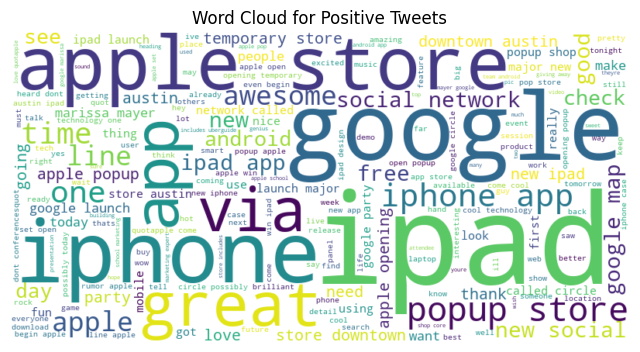

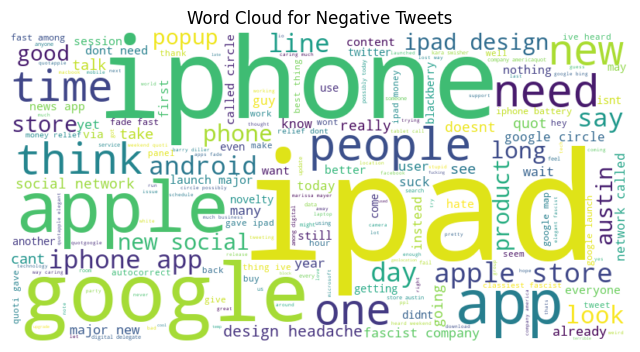

In [60]:
# Wordcloud for positive vs negative tweets

from wordcloud import WordCloud
for emotion in ["Positive", "Negative"]:
    text = " ".join(df[df["Emotion"]==emotion]["Clean_Tweet"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {emotion} Tweets")
plt.show()

The word clouds show the most frequent words in positive and negative tweets. In both cases, terms like **ipad, iphone, google, and apple** dominate, but negative tweets highlight words such as **not, need, and think**, whereas positive tweets emphasize words like **great, awesome, and free**.

5. Hashtag Analysis

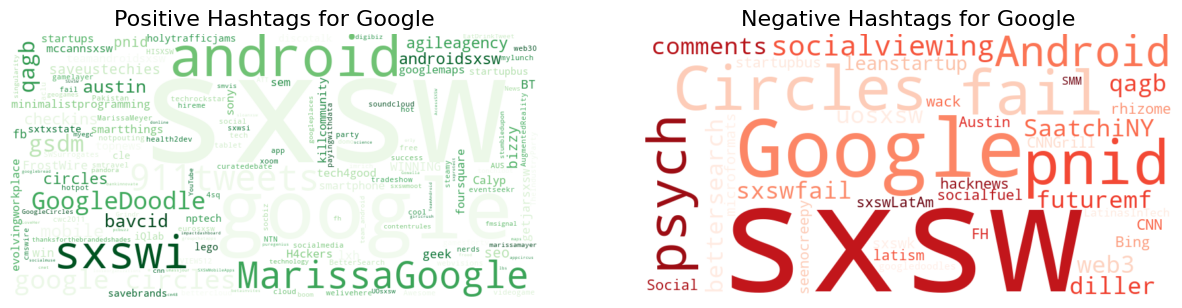

In [61]:
# Filter Google tweets only
google_df = df[df["Brand"].str.lower() == "google"]

# Function to flatten hashtags
def flatten_hashtags(series):
    hashtags = []
    for item in series.dropna():
        if isinstance(item, list):  # if hashtags are stored as lists
            hashtags.extend(item)
        else:  # if single string
            hashtags.append(item)
    return " ".join(hashtags)

# Positive hashtags
positive_hashtags = flatten_hashtags(
    google_df[google_df["Emotion"].str.lower() == "positive"]["Hashtag"]
)

# Negative hashtags
negative_hashtags = flatten_hashtags(
    google_df[google_df["Emotion"].str.lower() == "negative"]["Hashtag"]
)

# Generate word clouds
plt.figure(figsize=(15, 7))

# Positive
plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_hashtags)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Hashtags for Google", fontsize=16)

# Negative
plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_hashtags)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Hashtags for Google", fontsize=16)

plt.show()

Prominent positive Hashtags for google are : **SXSW (South by Southwest festival, where Google had a presence), google, android, circles (likely related to Google+), MarissaGoogle (probably referencing Marissa Mayer, a former Google exec), 911tweets, checkins, mobile (highlighting Google’s role in trending events and tech).**

Prominent Negative Hashtags for google are : **SXSW (again, but here linked with negative mentions), fail, Android (criticisms about Android), Circles (criticism of Google+ feature), psych, bettersearch, sxswfail, comments**

6. Sentiment Analysis 

 (a) Apple Tweets

In [59]:
from wordcloud import STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [62]:
# Ensure Clean_Tweet is a string (join tokens if it's a list)
df["Clean_Tweet"] = df["Clean_Tweet"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Filter Apple tweets only
df_apple = df[df["Brand"].str.lower() == "apple"]

# Separate sentiments
df_pos = df_apple[df_apple["Emotion"].str.lower() == "positive"]
df_neg = df_apple[df_apple["Emotion"].str.lower() == "negative"]

# Extra stopwords (remove brand terms so they don’t dominate)
extra_stops = {
    "apple","iphone","ipad","mac","macbook","imac","ios","watch","applewatch",
    "app","store","airpods","vision","pro","rt","https","http","co","amp"
}
stops = STOPWORDS.union(extra_stops)

# Build text corpora
text_pos = " ".join(df_pos["Clean_Tweet"].dropna())
text_neg = " ".join(df_neg["Clean_Tweet"].dropna())

# Generate wordclouds
wc_pos = WordCloud(width=800, height=600, background_color="white",
                   stopwords=stops, max_words=200).generate(text_pos)

wc_neg = WordCloud(width=800, height=600, background_color="black",
                   stopwords=stops, colormap="Reds", max_words=200).generate(text_neg)

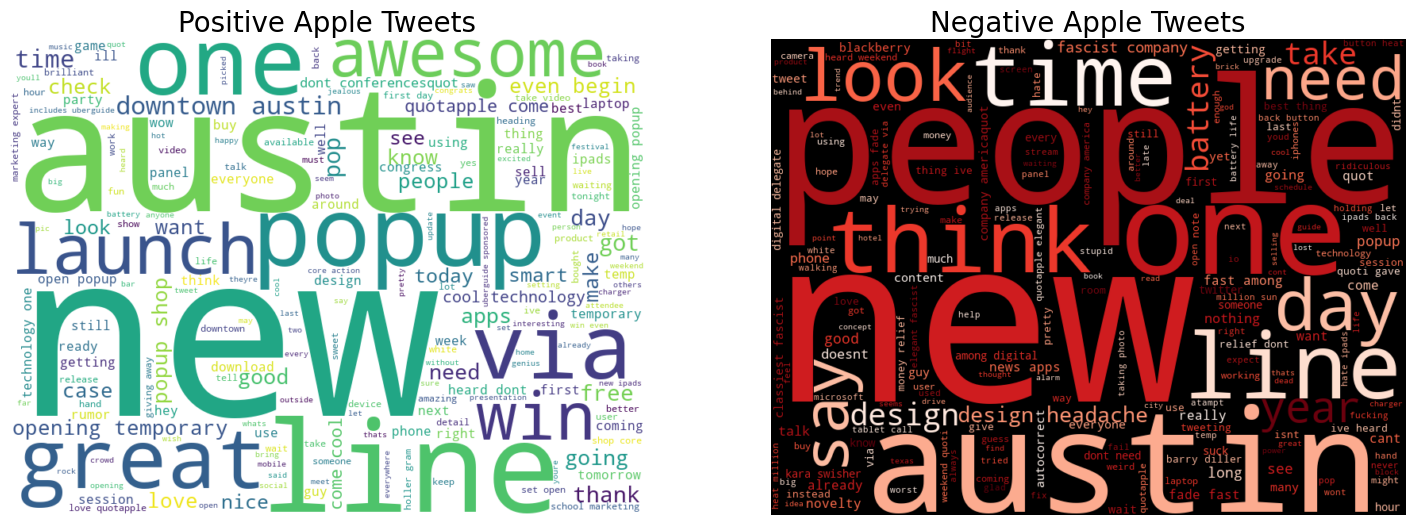

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

axs[0].imshow(wc_pos, interpolation="bilinear")
axs[0].set_title("Positive Apple Tweets", fontsize=20)
axs[0].axis("off")

axs[1].imshow(wc_neg, interpolation="bilinear")
axs[1].set_title("Negative Apple Tweets", fontsize=20)
axs[1].axis("off")

plt.show()

**Positive Apple Tweets**: Words like **“austin”, “new”, “launch”, and “awesome”** show excitement around Apple events and products. Positive tweets highlight enthusiasm, innovation, and user satisfaction.

**Negative Apple Tweets**: Frequent terms like **“battery”, “help”, and “headache”** point to frustrations with usability and product issues. Negative tweets focus on technical problems and unmet expectations.

(b) Google Tweets

In [64]:
# Filter Google tweets only
df_google = df[df["Brand"].str.lower() == "google"]

# Separate sentiments
df_pos = df_google[df_google["Emotion"].str.lower() == "positive"]
df_neg = df_google[df_google["Emotion"].str.lower() == "negative"]

# Extra stopwords (remove brand terms so they don’t dominate)
extra_stops = {
    "google","android","pixel","chrome","chromebook","gmail","youtube","maps","play",
    "search","assistant","nest","cloud","rt","https","http","co","amp"
}
stops = STOPWORDS.union(extra_stops)

# Build text corpora
text_pos = " ".join(df_pos["Clean_Tweet"].dropna())
text_neg = " ".join(df_neg["Clean_Tweet"].dropna())

# Generate wordclouds
wc_pos = WordCloud(width=800, height=600, background_color="white",
                   stopwords=stops, max_words=200).generate(text_pos)

wc_neg = WordCloud(width=800, height=600, background_color="black",
                   stopwords=stops, colormap="Reds", max_words=200).generate(text_neg)

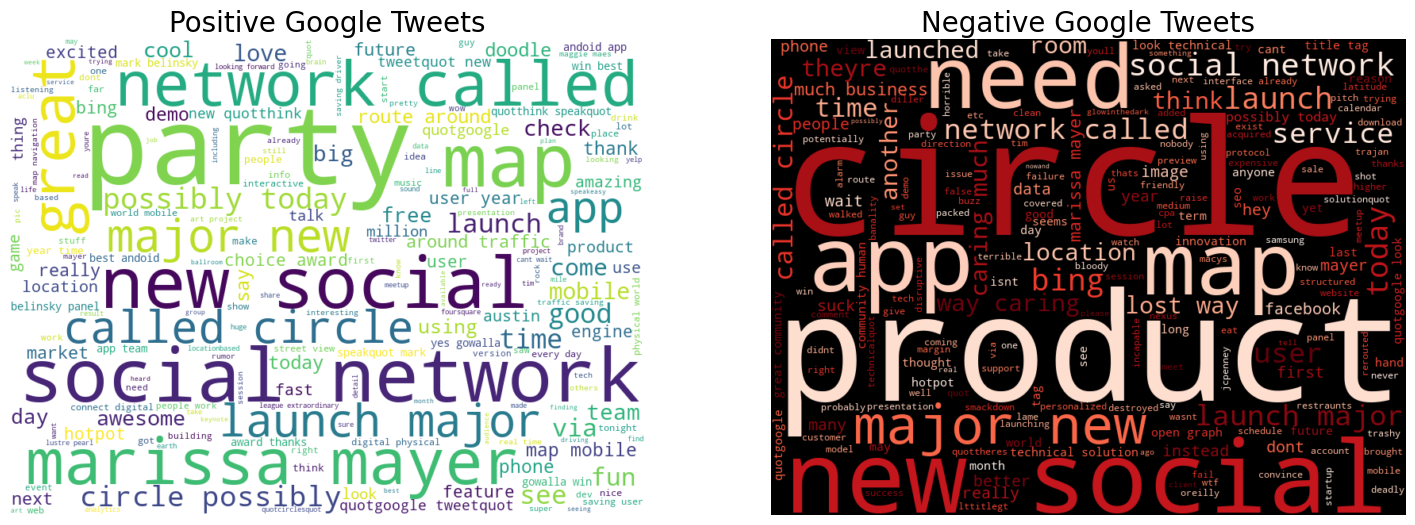

In [65]:
# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

axs[0].imshow(wc_pos, interpolation="bilinear")
axs[0].set_title("Positive Google Tweets", fontsize=20)
axs[0].axis("off")

axs[1].imshow(wc_neg, interpolation="bilinear")
axs[1].set_title("Negative Google Tweets", fontsize=20)
axs[1].axis("off")

plt.show()

Insights from the Word Clouds

Positive Tweets

Words like “party,” “social,” “network,” “new,” “map,” “marissa,” “mayer,” “circles” suggest:
    - Excitement about new features or products (e.g., Google+ Circles)
    - Positive mentions of Google executives (Marissa Mayer)
    - Interest in social networking and mapping tools

Negative Tweets

Words like “circle,” “product,” “need,” “app,” “launched,” “major,” “network” imply:

    - Frustration with new product launches
    - Criticism of apps or features
    - Possibly unmet expectations or usability issues

This marks the end of our Exploratory Data Analysis (EDA). We will now progress to the next stage.

### Modelling and Evaluation


In [66]:
# Libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tweet                  9070 non-null   object
 1   Device                 9070 non-null   object
 2   Emotion                9070 non-null   object
 3   Brand                  9070 non-null   object
 4   Tweet Character Count  9070 non-null   int64 
 5   Hashtag                9070 non-null   object
 6   Hashtag Count          9070 non-null   int64 
 7   Clean_Tweet            9070 non-null   object
 8   word_count             9070 non-null   int64 
 9   char_count             9070 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 779.5+ KB


We will build a binary model using positive and negative tweets to function as our baseline which will be simple and allow us to iterate also to make sure that the pipeline is working before scaling up to a multiclass or more sophisticated approach.
we will conduct a train test split (test size=0.2) then build two pipelines :CountVectorizer and TFIDF Vectorizer and compare the results.

### 1. Baseline Binary Logistic Model

In [70]:
# keep only positive and negative tweets
binary_df = df[df["Emotion"].isin(["Positive", "Negative"])].copy()

# train test split
X = binary_df["Clean_Tweet"].astype(str)
y = binary_df["Emotion"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")



Training samples: 2831, Testing samples: 708


In [76]:
# using CountVectorizer
base_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

base_pipeline.fit(X_train, y_train)

y_pred = base_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.8629943502824858
              precision    recall  f1-score   support

           0       0.67      0.30      0.41       114
           1       0.88      0.97      0.92       594

    accuracy                           0.86       708
   macro avg       0.77      0.63      0.67       708
weighted avg       0.84      0.86      0.84       708



In [77]:
# using TfidfVectorizer 
base_pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

base_pipeline_tfidf.fit(X_train, y_train)

y_pred = base_pipeline_tfidf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.8502824858757062
              precision    recall  f1-score   support

           0       0.79      0.10      0.17       114
           1       0.85      0.99      0.92       594

    accuracy                           0.85       708
   macro avg       0.82      0.55      0.54       708
weighted avg       0.84      0.85      0.80       708



From our train-test split we have 2831 Training samples and 708 test smples
Count Vectorizer achieved an accuracy of 86.58%, meaning it performed slightly better at predicting the correct labels on the test set.
TF-IDF Vectorizer had a slightly lower accuracy of 85.03%.
This suggests that, simple word frequency (Count Vectorizer) captured the relevant information slightly better than term frequency–inverse document frequency (TF-IDF). However, the difference is relatively small.


The following code prepares our dataset for an emotion classification task by ensuring the data types are appropriate and encoding the labels.

### 2. Multiclassifier Model 

In [83]:
## Features = tweets, Labels = sentiment
X = df["Clean_Tweet"].astype(str)   # ensure text format
y = df["Emotion"].astype(str)     # labels

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
#Fit the encoder and transform the labels into numeric form
y_encoded = label_encoder.fit_transform(y)
# Print the class labels found in the data
print("Classes:", label_encoder.classes_)

Classes: ['Negative' 'Neutral' 'Positive']


In [84]:
#train test split for multiclassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

#### Model Tuning: Optimizing Text Classification with GridSearchCV
To improve the performance of our sentiment classification models, we will perform model tuning using GridSearchCV. This process will involve systematically searching through combinations of hyperparameters for different classifiers, including Logistic Regression, Linear SVC, Random Forest, and Multinomial Naive Bayes. By using cross-validation and optimizing for macro F1-score, we aim to find the best-performing models that handle class imbalance and generalize well to unseen tweets. Both `CountVectorizer` and `TfidfVectorizer` were tested to evaluate how different text representation techniques affect classification outcomes.

In [85]:
# Define pipeline
pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),   # placeholder, will be swapped in grid
    ("smote", SMOTE(random_state=42)),   # Handles class imbalance
    ("clf", LogisticRegression())        # placeholder, will be swapped in grid
])



In [86]:
# STEP 3: Define parameter grid
param_grid = [

    # Logistic Regression
    {
        "vectorizer": [CountVectorizer(), TfidfVectorizer()],
        "vectorizer__ngram_range": [(1,1), (1,2)],
        "vectorizer__min_df": [1, 2],
        "clf": [LogisticRegression(max_iter=500, class_weight="balanced")],
        "clf__C": [0.1, 1, 10]
    },

    # Linear SVC
    {
        "vectorizer": [CountVectorizer(), TfidfVectorizer()],
        "vectorizer__ngram_range": [(1,1), (1,2)],
        "clf": [LinearSVC(class_weight="balanced")],
        "clf__C": [0.1, 1, 10]
    },

    # Multinomial NB
    {
        "vectorizer": [CountVectorizer(), TfidfVectorizer()],
        "vectorizer__ngram_range": [(1,1), (1,2)],
        "clf": [MultinomialNB()],
        "clf__alpha": [0.1, 1.0, 5.0]
    },

    # Random Forest
    {
        "vectorizer": [CountVectorizer(), TfidfVectorizer()],
        "clf": [RandomForestClassifier(random_state=42, class_weight="balanced")],
        "clf__n_estimators": [100, 300],
        "clf__max_depth": [10, None]
    },

    # Gradient Boosting
    {
        "vectorizer": [CountVectorizer(), TfidfVectorizer()],
        "clf": [GradientBoostingClassifier(random_state=42)],
        "clf__n_estimators": [100, 300],
        "clf__learning_rate": [0.05, 0.1]
    }
]


In [89]:
# STEP 4: Grid Search with Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring="f1_macro",   # accuracy = good for overall performance
    n_jobs=-1,
    verbose=2
)

# STEP 5: Fit model
grid.fit(X_train, y_train)

# STEP 6: Best results
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'clf': LogisticRegression(class_weight='balanced', max_iter=500), 'clf__C': 10, 'vectorizer': TfidfVectorizer(), 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.5671391610669


For modeling, we used the **scikit-learn** package (`sklearn`) along with **imblearn** (`SMOTE`) to address class imbalance.  

We implemented a **Pipeline** that allowed us to combine preprocessing steps (vectorization and SMOTE) with model training in a single workflow.  

The pipeline included:
- **Vectorizers**: `CountVectorizer` and `TfidfVectorizer` for text feature extraction.
- **SMOTE**: Synthetic Minority Oversampling Technique to balance the dataset by oversampling minority classes.
- **Classifiers**: Several supervised learning models were evaluated, including:
  - Logistic Regression  
  - Linear Support Vector Classifier (LinearSVC)  
  - Multinomial Naive Bayes  
  - Random Forest  
  - Gradient Boosting  

### Hyperparameter Tuning
We performed **GridSearchCV** with **StratifiedKFold cross-validation (5 folds)** to ensure balanced class splits.  
The hyperparameters tuned included:
- **Vectorizers**: n-gram range and minimum document frequency (`min_df`).  
- **Logistic Regression**: regularization strength `C`.  
- **LinearSVC**: regularization strength `C`.  
- **Multinomial Naive Bayes**: smoothing parameter `alpha`.  
- **Random Forest**: number of estimators (`n_estimators`) and tree depth (`max_depth`).  
- **Gradient Boosting**: number of estimators (`n_estimators`) and learning rate.  

### Evaluation Metric
The primary scoring metric used was **F1 Macro**, which is more appropriate than accuracy for imbalanced datasets because it weights each class equally.  

This approach allowed us to systematically compare models, select the best hyperparameters, and mitigate issues of class imbalance through SMOTE.


## Results

After performing hyperparameter tuning with **GridSearchCV** (5-fold cross-validation), the following best configuration was identified:

- **Model**: Logistic Regression  
- **Vectorizer**: TF-IDF  
- **Vectorizer Parameters**: `ngram_range=(1, 2)`, `min_df=1`  
- **Classifier Parameters**: `C=10`, `class_weight="balanced"`, `max_iter=500`  

The best cross-validation score (using **macro F1**) was:

**Best CV Score:** 0.5671  

This indicates that the tuned Logistic Regression model with TF-IDF vectorization and bigram features achieved a reasonable performance in balancing precision and recall across all classes.  
Since we used **F1-macro** as the scoring metric, the result reflects performance across both frequent and less frequent classes, making it suitable for our imbalanced dataset.


## Evaluation of the final Model

We used **accuracy** to measure the overall performance of the model. However, since the dataset is imbalanced, accuracy alone could be misleading. To address this, we included **macro F1**, which gives equal weight to each class, ensuring minority classes are fairly evaluated. Additionally, **ROC-AUC** was used to capture the model’s ability to distinguish between classes across different thresholds.  


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize

# Predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Standard Metrics 
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


✅ Test Accuracy: 0.6714443219404631
✅ Test Macro F1: 0.5769037455653154

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.37      0.40       114
           1       0.76      0.74      0.75      1106
           2       0.57      0.61      0.59       594

    accuracy                           0.67      1814
   macro avg       0.58      0.57      0.58      1814
weighted avg       0.67      0.67      0.67      1814



We evaluated the final tuned model on the test set and the following performance metrics were obtained:
- Test Accuracy = 0.67
This means the model correctly classified ~ 67% of all tweets. Accuracy gives a general sense of performance but can be misleading in imbalanced datasets, as it may be biased toward the majority class.
- Test Macro =0.57
Macro F1 averages F1 scores accross all classes equally, regardless of their size. A score of 0.58 shows that while the model does reasonably well overall, performance is uneven across classes.

Classification Report (per class):

- Class 0 (Negative Tweets)

  - Precision: 0.43 → When the model predicts "negative," it's correct 43% of the time.

  - Recall: 0.37 → The model only identifies 37% of actual negative tweets, missing many of them.

  - F1-score: 0.40 → Weak performance, showing the model struggles with minority/negative class.

- Class 1 (Positive Tweets)

  - Precision: 0.76 → Predictions for "positive" are correct 76% of the time.

  - Recall: 0.74 → The model captures most positive tweets (strong recall).

  - F1-score: 0.75 → Strong, consistent performance; this class dominates the dataset, so the model learns it best.

- Class 2 (Neutral Tweets)

  - Precision: 0.57 → Predictions are moderately correct.

  - Recall: 0.61 → The model captures 61% of neutral tweets.

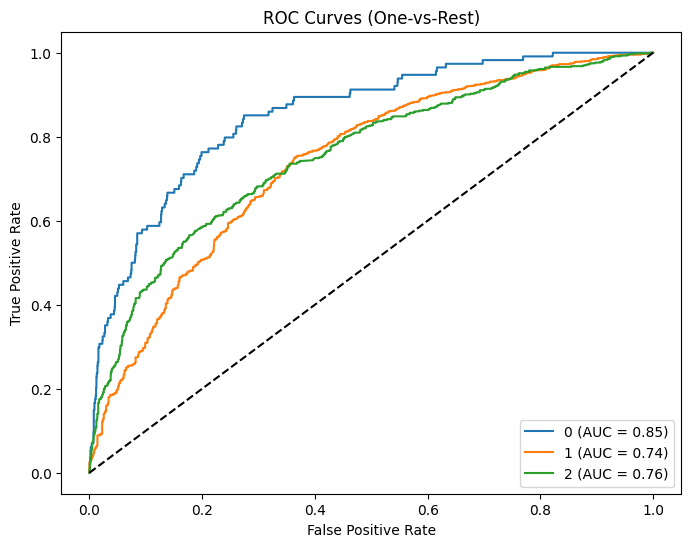

In [91]:
# predict probabilities
y_score = best_model.predict_proba(X_test)

# Binarize labels for multiclass ROC
classes = best_model.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# ROC & AUC (one-vs-rest for multiclass) ---
y_test_bin = label_binarize(y_test, classes=best_model.classes_)
y_score = best_model.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8,6))

for i, cls in enumerate(best_model.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{cls} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1],[0,1],"k--")
plt.title("ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

- Class 0 (Negative) = 0.85
    - This shows strong separation between negative and non-negative classes. This shows the negative class is usually harder to detect in imbalanced datasets.

- Class 1 (Neutral) = 0.74
    - This indicates moderate separation between neutral and non-neutral classes. The neutral class is somewhat easier to detect but still presents challenges in an imbalanced dataset.

- Class 2 (Positive) = 0.76
    - This shows good separation between positive and non-positive classes. The positive class is generally easier to detect but can still be affected by class imbalances.


In [92]:
# Macro & Weighted AUC
print("Macro AUC:", roc_auc_score(y_test_bin, y_score, average="macro"))
print("Weighted AUC:", roc_auc_score(y_test_bin, y_score, average="weighted"))

Macro AUC: 0.7835451819150129
Weighted AUC: 0.7534353622427793


- **Macro AUC: 0.78**
    - This is the average AUC across all classes, treating them equally (regardless of class size).

    - A value close to 0.8 indicates that the model has good overall discriminative ability to distinguish between positive, negative, and neutral tweets.

    - The macro value is particularly important here because it shows the model is not just biased toward the majority class but also has some capability with minority classes.

- **Weighted AUC: 0.75**
    - This AUC is weighted by class support (larger classes contribute more).

   - The slightly lower score compared to macro AUC reflects the dataset imbalance — since the majority (positive tweets) dominates, the model’s weaker performance on negative tweets pulls the weighted AUC down.

## Recommendations

1. Enhance Product Support & Communication

   * Negative sentiment tweets often highlight recurring customer frustrations (e.g., device performance issues, app bugs, or unclear updates). Apple and Google should proactively address these concerns by strengthening customer support responsiveness (e.g by increasing the number of customer support representatives and using FAQs/chatbots to reduce wait times).

2. Leverage Positive Sentiment for Marketing

   * Positive tweets can be repurposed for marketing campaigns, testimonials, or case studies. Highlighting satisfied customer stories builds brand trust, reinforces customer loyalty and attracts new customers to buy the products.

3. Improve Product Development Based on Feedback

   * Frequent negative mentions about specific product features (e.g., iOS updates, Android battery life) can guide R&D priorities. Systematically feeding sentiment insights into product development cycles will help align products with user expectations.

4. Monitor Competitor Sentiment for Strategic Positioning

   * Since the project compares Apple and Google, differences in sentiment trends reveal competitive advantages. For example, if Apple has more praise for design but Google wins on affordability, both companies can refine positioning strategies accordingly.

5. Strengthen Crisis Management with Real-Time Monitoring

   * Spikes in negative sentiment (e.g., after product recalls, service outages, or controversial announcements) can be detected early through automated sentiment dashboards. Both firms should integrate this into PR strategies to manage crises swiftly.